In [11]:
from typing import List, Optional, Tuple

import sys
import hydra
import torch
import shutil
import numpy as np
import pandas as pd
import pyrootutils
import pytorch_lightning as pl
import matplotlib.pyplot as plt


from omegaconf import DictConfig
from pytorch_lightning import Callback, LightningDataModule, LightningModule, Trainer
from pytorch_lightning.loggers import LightningLoggerBase

root = pyrootutils.setup_root(sys.path[0], pythonpath=True, cwd=True)



# shutil.copytree("configs/", "notebooks/configs/", dirs_exist_ok=True)
%matplotlib inline

# Instantiating all the models

In [12]:
shutil.copy("configs/config.yaml", "notebooks/config.yaml")
with hydra.initialize(version_base=None, config_path="./"):
    config = hydra.compose(config_name="config.yaml")

In [13]:
datamodule = hydra.utils.instantiate(config.datamodule)

logger = hydra.utils.instantiate(config.csv)


model_checkpoint = hydra.utils.instantiate(config.model_checkpoint)
early_stopping = hydra.utils.instantiate(config.early_stopping)


bn_model = hydra.utils.instantiate(config.bn_model)
trainer_bn = hydra.utils.instantiate(config.trainer, logger=logger)


gn_model = hydra.utils.instantiate(config.gn_model)
trainer_gn = hydra.utils.instantiate(config.trainer, logger=logger)


ln_model = hydra.utils.instantiate(config.ln_model)
trainer_ln = hydra.utils.instantiate(config.trainer, logger=logger)

# , callbacks=[model_checkpoint, early_stopping]

/home/shivam13juna/Documents/virtual_envs/mlo/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:261: UserWarning: Attribute 'net' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['net'])`.
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


# Training Model(s)

## Training Batch Normalization Model

In [14]:
trainer_bn.fit(model=bn_model, datamodule=datamodule)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type                | Params
-----------------------------------------------------
0 | net          | L1RegularizedConv2D | 10.2 K
1 | criterion    | CrossEntropyLoss    | 0     
2 | train_acc    | Accuracy            | 0     
3 | val_acc      | Accuracy            | 0     
4 | test_acc     | Accuracy            | 0     
5 | train_loss   | MeanMetric          | 0     
6 | val_loss     | MeanMetric          | 0     
7 | test_loss    | MeanMetric          | 0     
8 | val_acc_best | MaxMetric           | 0     
-----------------------------------------------------
10.2 K    Trainable params
0         Non-trainable params
10.2 K    Total params
0.041     Total estimated model params size (MB)


Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]

/home/shivam13juna/Documents/virtual_envs/mlo/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:219: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


/home/shivam13juna/Documents/learn/tsai/eva_8/S5/src/models/components/bn_model.py:98: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/home/shivam13juna/Documents/virtual_envs/mlo/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:219: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 4: 100%|██████████| 60/60 [00:09<00:00,  6.28it/s, loss=0.249, v_num=2, val/loss=0.141, val/acc=0.973, val/acc_best=0.973, train/loss=0.277, train/acc=0.952]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 60/60 [00:09<00:00,  6.26it/s, loss=0.249, v_num=2, val/loss=0.141, val/acc=0.973, val/acc_best=0.973, train/loss=0.277, train/acc=0.952]


<AxesSubplot: xlabel='epoch'>

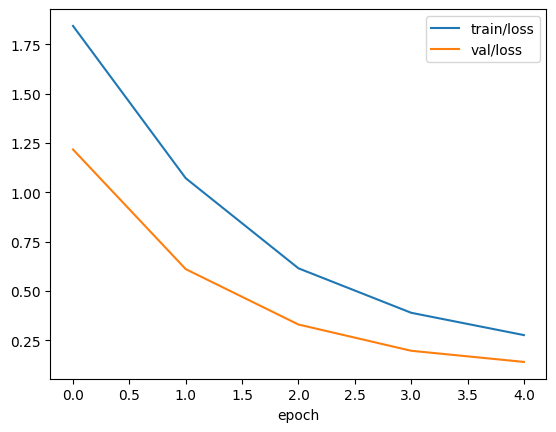

In [15]:
bn_metrics = pd.read_csv(trainer_bn.checkpoint_callback.best_model_path.rsplit("/", 2)[0] + '/metrics.csv').groupby('epoch').sum().reset_index()
# Make sure x axis is integer
bn_metrics.groupby('epoch').sum().reset_index().plot(x='epoch', y=['train/loss', 'val/loss'])

## Training Group Normalization Model

In [16]:
trainer_gn.fit(model=gn_model, datamodule=datamodule)

/home/shivam13juna/Documents/virtual_envs/mlo/lib/python3.10/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:616: UserWarning: Checkpoint directory output/csv/version_2/checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type             | Params
--------------------------------------------------
0 | net          | ConvNet          | 10.2 K
1 | criterion    | CrossEntropyLoss | 0     
2 | train_acc    | Accuracy         | 0     
3 | val_acc      | Accuracy         | 0     
4 | test_acc     | Accuracy         | 0     
5 | train_loss   | MeanMetric       | 0     
6 | val_loss     | MeanMetric       | 0     
7 | test_loss    | MeanMetric       | 0     
8 | val_acc_best | MaxMetric        | 0     
--------------------------------------------------
10.2 K    Trainable params
0         Non-trainable params
10.2 K    Total params
0.041     Total estimated m

Sanity Checking: 0it [00:00, ?it/s]

/home/shivam13juna/Documents/virtual_envs/mlo/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:219: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Sanity Checking DataLoader 0:  50%|█████     | 1/2 [00:00<00:00, 85.53it/s]

/home/shivam13juna/Documents/learn/tsai/eva_8/S5/src/models/components/gn_model.py:98: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


/home/shivam13juna/Documents/virtual_envs/mlo/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:219: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 4: 100%|██████████| 60/60 [00:09<00:00,  6.40it/s, loss=0.235, v_num=2, val/loss=0.138, val/acc=0.975, val/acc_best=0.975, train/loss=0.258, train/acc=0.950]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 60/60 [00:09<00:00,  6.39it/s, loss=0.235, v_num=2, val/loss=0.138, val/acc=0.975, val/acc_best=0.975, train/loss=0.258, train/acc=0.950]


<AxesSubplot: xlabel='epoch'>

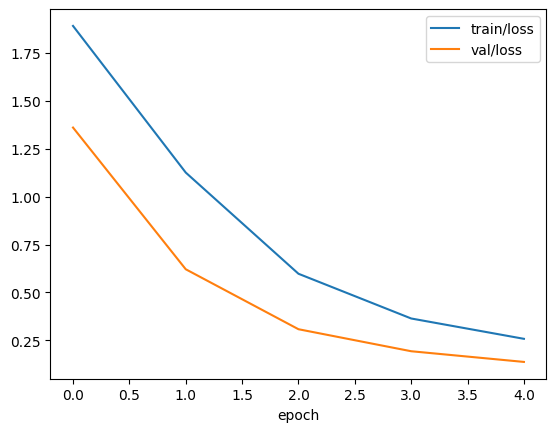

In [17]:
gn_metrics = pd.read_csv(trainer_gn.checkpoint_callback.best_model_path.rsplit("/", 2)[0] + '/metrics.csv').loc[10:19].groupby('epoch').sum().reset_index()
# Make sure x axis is integer
gn_metrics.groupby('epoch').sum().reset_index().plot(x='epoch', y=['train/loss', 'val/loss'])

## Training Layer Normalization Model

In [18]:
trainer_ln.fit(model=ln_model, datamodule=datamodule)

/home/shivam13juna/Documents/virtual_envs/mlo/lib/python3.10/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:616: UserWarning: Checkpoint directory output/csv/version_2/checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type             | Params
--------------------------------------------------
0 | net          | ConvNet          | 10.0 K
1 | criterion    | CrossEntropyLoss | 0     
2 | train_acc    | Accuracy         | 0     
3 | val_acc      | Accuracy         | 0     
4 | test_acc     | Accuracy         | 0     
5 | train_loss   | MeanMetric       | 0     
6 | val_loss     | MeanMetric       | 0     
7 | test_loss    | MeanMetric       | 0     
8 | val_acc_best | MaxMetric        | 0     
--------------------------------------------------
10.0 K    Trainable params
0         Non-trainable params
10.0 K    Total params
0.040     Total estimated m

Sanity Checking: 0it [00:00, ?it/s]

/home/shivam13juna/Documents/virtual_envs/mlo/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:219: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]

RuntimeError: Given normalized_shape=[1], expected input with shape [*, 1], but got input of size[1000, 10, 28, 28]

In [ ]:
trainer_ln.checkpoint_callback.best_model_path

'output/csv/version_1/checkpoints/epoch=4-step=275-v2.ckpt'

<AxesSubplot: xlabel='epoch'>

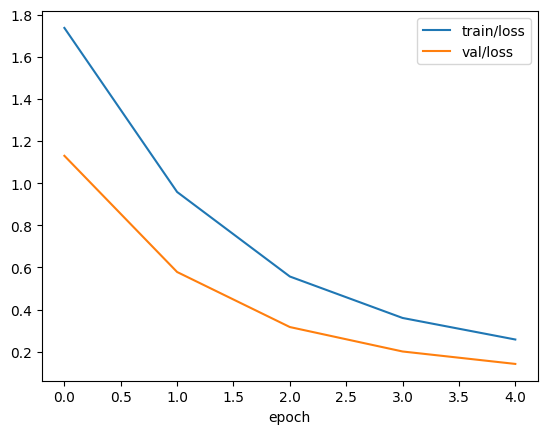

In [ ]:
ln_metrics = pd.read_csv(trainer_ln.checkpoint_callback.best_model_path.rsplit("/", 2)[0] + '/metrics.csv')[20:].groupby('epoch').sum().reset_index()
# Make sure x axis is integer
ln_metrics.groupby('epoch').sum().reset_index().plot(x='epoch', y=['train/loss', 'val/loss'])

## Aggregating Graphs and metrics

In [ ]:
# Plot val/loss for bn_metrics, gn_metrics, ln_metrics in one plot for comparison

plt.plot(bn_metrics['epoch'], bn_metrics['val/loss'], label='BatchNorm')
plt.plot(gn_metrics['epoch'], gn_metrics['val/loss'], label='GroupNorm')
plt.plot(ln_metrics['epoch'], ln_metrics['val/loss'], label='LayerNorm')
# Add name of the plot 
plt.title('Comparison of val/loss for different normalization methods')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

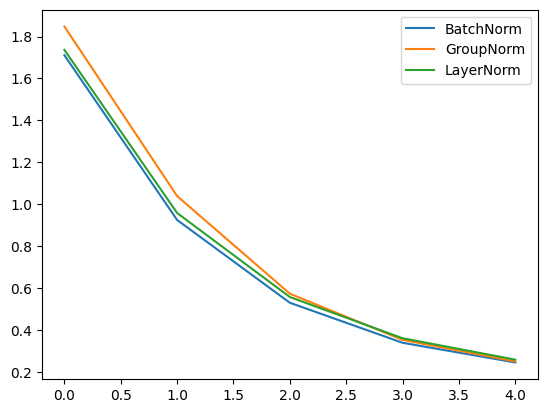

In [ ]:
# Plot train/loss for bn_metrics, gn_metrics, ln_metrics in one plot for comparison

plt.plot(bn_metrics['epoch'], bn_metrics['train/loss'], label='BatchNorm')
plt.plot(gn_metrics['epoch'], gn_metrics['train/loss'], label='GroupNorm')
plt.plot(ln_metrics['epoch'], ln_metrics['train/loss'], label='LayerNorm')
plt.legend()
plt.show()


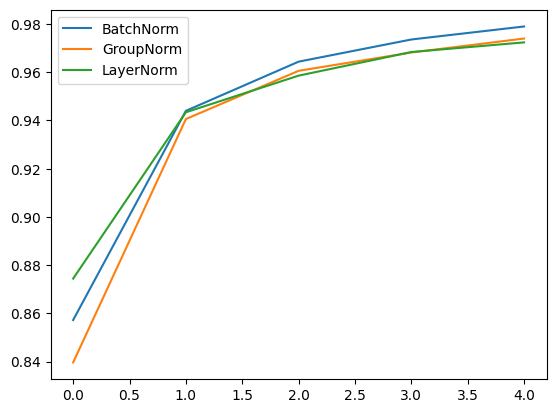

In [ ]:
# Plot val/acc for bn_metrics, gn_metrics, ln_metrics in one plot for comparison

plt.plot(bn_metrics['epoch'], bn_metrics['val/acc'], label='BatchNorm')
plt.plot(gn_metrics['epoch'], gn_metrics['val/acc'], label='GroupNorm')
plt.plot(ln_metrics['epoch'], ln_metrics['val/acc'], label='LayerNorm')
plt.legend()
plt.show()


In [ ]:
test_data = np.stack([i[0] for i in datamodule.data_test])
test_labels = np.stack([i[1] for i in datamodule.data_test])


bn_preds = np.argmax(bn_model(torch.from_numpy(test_data).float()).detach().numpy(), axis=1)
gn_preds = np.argmax(gn_model(torch.from_numpy(test_data).float()).detach().numpy(), axis=1)
ln_preds = np.argmax(ln_model(torch.from_numpy(test_data).float()).detach().numpy(), axis=1)

/home/shivam13juna/Documents/learn/tsai/eva_8/v2_S5/src/models/components/gn_model.py:98: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/home/shivam13juna/Documents/learn/tsai/eva_8/v2_S5/src/models/components/ln_model.py:98: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


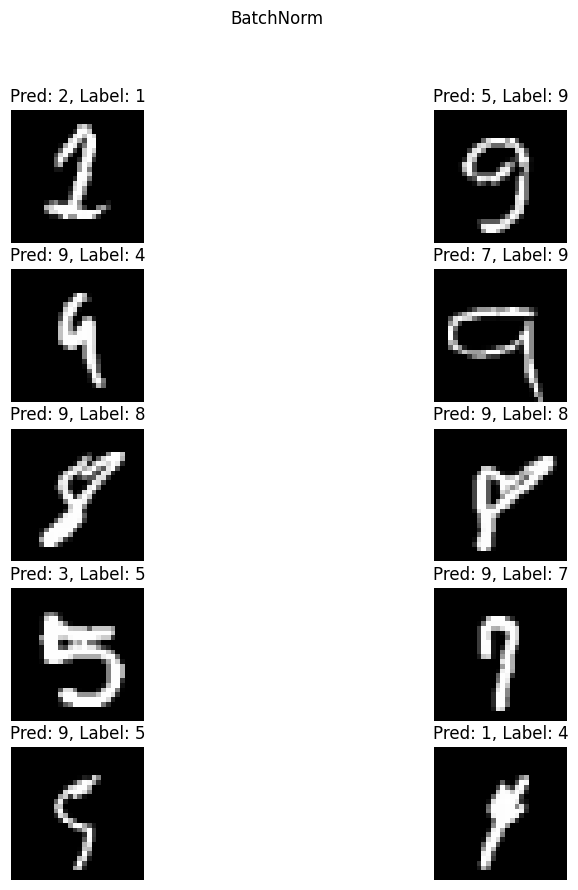

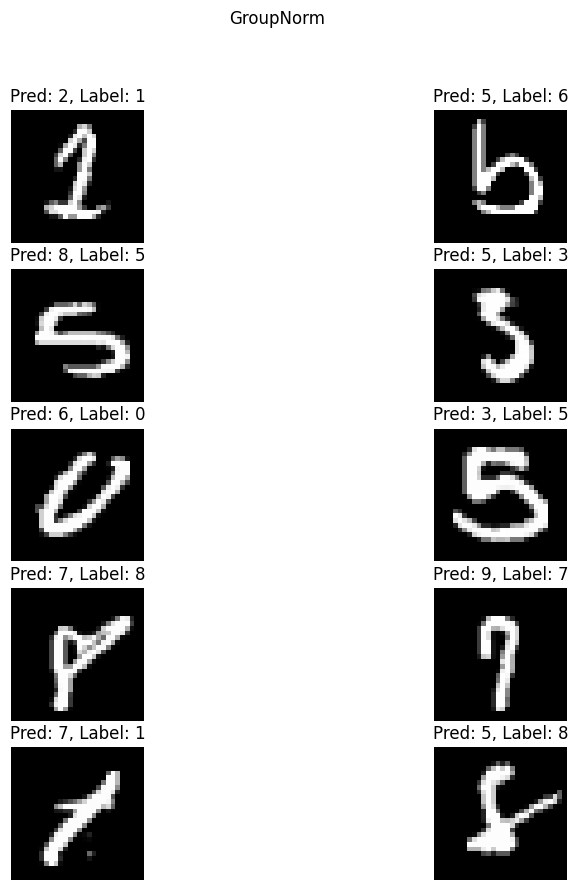

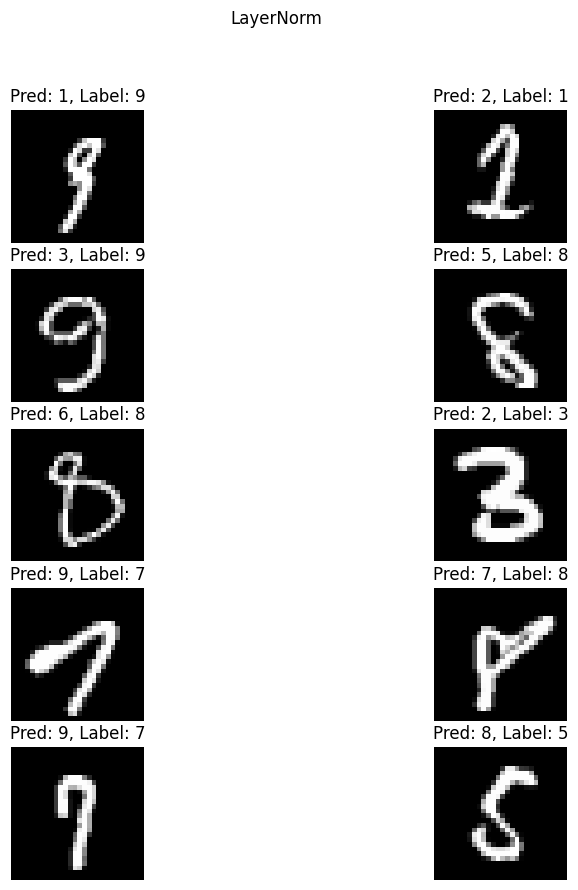

In [ ]:
# Find 10 misclassified images for each of the 3 models, and show them as a 5x2 image matrix in 3 separately annotated images. 
# The images should be in the same order for each model, i.e. the first image in the matrix should be the same for all 3 models.

def plot_misclassified_images(model_name, preds, labels, data):
    fig, axs = plt.subplots(5, 2, figsize=(10, 10))
    fig.suptitle(model_name)
    for i, ax in enumerate(axs.flatten()):
        # Here we're using axs.
        idx = np.where(preds != labels)[0][i]
        ax.imshow(data[idx].reshape(28, 28), cmap='gray')
        ax.set_title(f"Pred: {preds[idx]}, Label: {labels[idx]}")
        ax.axis('off')
    plt.show()

plot_misclassified_images("BatchNorm", bn_preds, test_labels, test_data)
plot_misclassified_images("GroupNorm", gn_preds, test_labels, test_data)
plot_misclassified_images("LayerNorm", ln_preds, test_labels, test_data)